In [1]:
import numpy as np
import pandas as pd
import schedule
import time
import feedparser
import urllib.request, urllib.error
import os, datetime
import sys
from bs4 import BeautifulSoup
import MeCab
import oseti
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows",150)
pd.set_option('display.max_columns', 150)

# URLとタイトルをRSSから取得

In [5]:
URL_list =["http://military38.com/index.rdf"]
X1 = pd.DataFrame(columns=["title","url","date"])

# def RSS_GET(URL_list,df):
#     for rss in URL_list:
#         feed = feedparser.parse(rss)
#         Date = feed.headers["Date"]
#         for entry in feed.entries:
#             temp= pd.Series([entry.title,entry.link, Date],index=df.columns)
#             if temp.url not in df.url:
#                 df = df.append(temp,ignore_index=True)        
#     return df

# X1 = RSS_GET(URL_list,X1)

X1 = pd.read_csv("X1_0728.csv")
X1.drop(columns="Unnamed: 0",inplace=True)
X1

,title,url,date
0,野党、国会で審議すべき課題が山積 臨時国会の召集を,http://military38.com/archives/54872413.html,"Wed, 29 Jul 2020 06:21:17 GMT"
1,もし日本が最後まで無条件降伏しなかったら,http://military38.com/archives/54308723.html,"Wed, 29 Jul 2020 06:21:17 GMT"
2,自衛隊員「だ、ダメだ…！戦争とはいえ、人なんか撃てない…！」ｶﾞﾀｶﾞﾀ,http://military38.com/archives/54871992.html,"Wed, 29 Jul 2020 06:21:17 GMT"
3,GoToトラベルキャンペーン、東京以外の地域が予約後に「適用除外」の場合、割引分は客負担 キ...,http://military38.com/archives/54871785.html,"Wed, 29 Jul 2020 06:21:17 GMT"
4,中国は大東亜戦争の時のアメリカの何を見て学んで、全方位敵対外交なんてバカなことしたんだろうな。,http://military38.com/archives/54871691.html,"Wed, 29 Jul 2020 06:21:17 GMT"
5,【中東情勢】イラン、ペルシャ湾で軍事演習 米空母の実物大模型を攻撃,http://military38.com/archives/54871653.html,"Wed, 29 Jul 2020 06:21:17 GMT"
6,中国外相「横暴なアメリカに理性的で断固たる対応」,http://military38.com/archives/54871547.html,"Wed, 29 Jul 2020 06:21:17 GMT"
7,原子力発電所「核反応させてお湯わかして蒸気作ります」,http://military38.com/archives/54865708.html,"Wed, 29 Jul 2020 06:21:17 GMT"
8,田舎から若者がいなくなるのは当たり前じゃね？,http://military38.com/archives/54870861.html,"Wed, 29 Jul 2020 06:21:17 GMT"
9,明智光秀「信長の重鎮になったよ母さん！」母親「…」,http://military38.com/archives/54869238.html,"Wed, 29 Jul 2020 06:21:17 GMT"


In [6]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
model = Doc2Vec.load("model/jawiki.doc2vec.dbow300d.model")

In [7]:
def get_text(URL):
    """
    URL先の書込みテキストを取得。
    """
    instance = urllib.request.urlopen(URL)
    soup = BeautifulSoup(instance, "html.parser")
    temp1 = soup.find_all('div',class_=["t_b","t_b t_i"])    
    writing_list=[]
    writing_list.append(soup.title.string)
    for i in range(len(temp1)):
        writing_list.append(temp1[i].get_text().replace(" ",""))
    all_text = writing_list
    
    return URL, all_text

### リンク先の書込み内容を取得。各書込みを形態要素に分割（MeCab）。

In [8]:
X2 = pd.DataFrame(columns=["url","ALL_TEXT"])
count = 0
for i,URL in enumerate(X1.url):
    X2.loc[i] = get_text(URL)

X2.head(3)

,url,ALL_TEXT
0,http://military38.com/archives/54872413.html,"[野党、国会で審議すべき課題が山積 臨時国会の召集を : 大艦巨砲主義！, 立憲民主党などの..."
1,http://military38.com/archives/54308723.html,"[もし日本が最後まで無条件降伏しなかったら : 大艦巨砲主義！, どうなってたん？, 本土上..."
2,http://military38.com/archives/54871992.html,[自衛隊員「だ、ダメだ…！戦争とはいえ、人なんか撃てない…！」ｶﾞﾀｶﾞﾀ : 大艦巨砲主義...


In [9]:
X3 = pd.DataFrame(columns=["url","separate_TEXT"])
X3.url = X2.url
for i,sentense in enumerate(X2.ALL_TEXT):
    d2v_list = []
    for j in sentense:
        m = MeCab.Tagger("-Owakati")
        temp = m.parse(j)
        temp_list =temp.split()
        d2v_list.append(temp_list)
    X3.loc[i,"separate_TEXT"] = d2v_list
X3.head(3)

,url,separate_TEXT
0,http://military38.com/archives/54872413.html,"[[野党, 、, 国会, で, 審議, す, べき, 課題, が, 山積, 臨時, 国会, ..."
1,http://military38.com/archives/54308723.html,"[[もし, 日本, が, 最後, まで, 無条件, 降伏, し, なかっ, たら, :, 大..."
2,http://military38.com/archives/54871992.html,"[[自衛隊, 員, 「, だ, 、, ダメ, だ, …, ！, 戦争, と, は, いえ, ..."


In [30]:
# X1.to_csv("X1_0729.csv",mode="w",encoding="utf_8_sig")
# X2.to_csv("X2_0729.csv",mode="w",encoding="utf_8_sig")
# X3.to_csv("X3_0729.csv",mode="w",encoding="utf_8_sig")

## 各書込みを、Doc2Vecで文単位で分散表現化（300次元）。掲示板ごとに文単位の分散表現を合計し次元削減による分析を行う。

In [10]:
X4 = pd.DataFrame(columns=["url","sum_vector"])
X4.url = X2.url
vector_data = np.zeros([len(X4),300])
for j,separate in enumerate(X3.separate_TEXT):
    trainings = [TaggedDocument(words = data,tags = [i]) for i,data in enumerate(separate)]

    temp_sum = np.zeros(300)
    for i in range(len(trainings)):
        temp = model.infer_vector(trainings[i].words)
        temp_sum += temp
    temp_sum = temp_sum/len(trainings)
    X4.sum_vector[j] = temp_sum
    vector_data[j]=temp_sum
X4.head(3)

,url,sum_vector
0,http://military38.com/archives/54872413.html,"[0.08599600923480466, -0.09996127081103623, 0...."
1,http://military38.com/archives/54308723.html,"[0.07533733585201528, -0.051352900822403964, 0..."
2,http://military38.com/archives/54871992.html,"[0.09799478793635018, -0.08734769154236549, -0..."


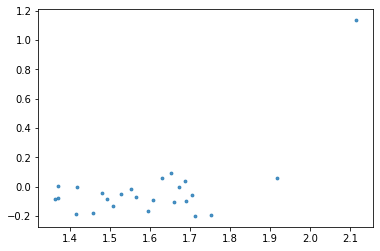

In [11]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD

lsa = TruncatedSVD(n_components=2)
lsa.fit(vector_data)
lsa_scores = lsa.transform(vector_data)
plt.scatter(lsa_scores[:,0], lsa_scores[:,1],s=8,alpha=0.8)
plt.show()

###### ＜考察＞
外れ値をとっているのは、４番と９番。またこれらとの比較のため３番をピックアップした（掲示板タイトルは下記）。４番は、多角的な観点を提示し合う比較的良質な書込みが多い。９番はセリフメインの物語調の書込みであり、使用単語や文体、カギカッコの多用など、他と明らかに相違がある。３番は、不平不満が均質なトーンで書き込まれている。

In [31]:
print("4番:"+X1.loc[4,"title"])
print("9番:"+X1.loc[9,"title"])
print("3番:"+X1.loc[3,"title"])

4番:中国は大東亜戦争の時のアメリカの何を見て学んで、全方位敵対外交なんてバカなことしたんだろうな。
9番:明智光秀「信長の重鎮になったよ母さん！」母親「…」
3番:GoToトラベルキャンペーン、東京以外の地域が予約後に「適用除外」の場合、割引分は客負担　キャンセル料も補償なし


In [32]:
lsa_scores[4],lsa_scores[9],lsa_scores[3]

(array([1.91819119, 0.05692919]),
 array([2.11520429, 1.13660459]),
 array([ 1.48085966, -0.04153908]))

In [24]:
X5 = pd.DataFrame(columns=["url","v_cosins"])
X5.url = X2.url

for j,separate in enumerate(X3.separate_TEXT):
    trainings = [TaggedDocument(words = data,tags = [i]) for i,data in enumerate(separate)]
    cosins_list =[]
    for i in range(len(trainings)-1):
        temp = model.docvecs.similarity_unseen_docs(model,trainings[i].words,trainings[i+1].words,
                                               alpha=0.1, min_alpha=0.0001, steps=5)
        cosins_list.append(temp)
    X5.v_cosins[j] = cosins_list
X5.head(3)

,url,v_cosins
0,http://military38.com/archives/54872413.html,"[0.5786756, 0.26172608, 0.46807212, 0.5688972,..."
1,http://military38.com/archives/54308723.html,"[0.4535231, 0.434029, 0.38692588, 0.54498905, ..."
2,http://military38.com/archives/54871992.html,"[0.5440824, 0.7154709, 0.7029014, 0.6491417, 0..."


# 各掲示板での連続する書込みの関係性を考察する（書込みのコサイン類似度の取得）。

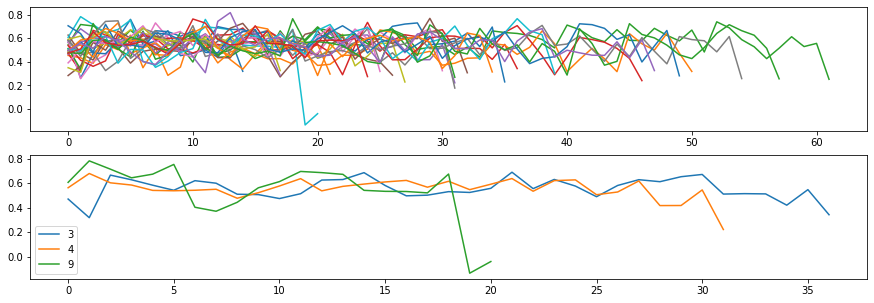

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[15, 5])
plt.subplot(2,1,1)

for i in range(len(X5)):
    plt.plot(X5.v_cosins[i])
    
plt.subplot(2,1,2)
plt.plot(X5.v_cosins[3],label="3")
plt.plot(X5.v_cosins[4],label="4")
plt.plot(X5.v_cosins[9],label="9")
plt.legend()
plt.show()

###### ＜考察＞
コサイン類似度は0.3～0.7程度で波打つように推移（末尾で急激に落ちるのは前処理が不十分であるため）。
・物語調の９番は、0.0～0.8で大きめに変動。９番を見る限りコサイン類似度は単語の重複度合いで決定されているように見受けられる。物語の途中で他人が短く書き込むことで落ち込むが（x=7付近）、登場人物への言及等、書込み単語が共通していれば落ち込む度合いが少なそう（X=14付近）。
・３番と４番は、9番よりも少ない変動で推移する傾向にある。

### 各掲示板における連続する書込み間のコサイン類似度のヒストグラム（横軸：コサイン類似度、縦軸：度数）

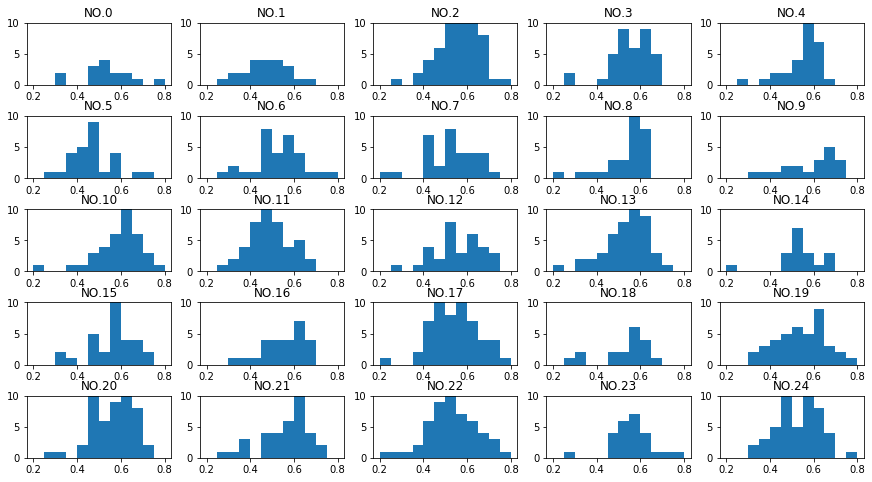

In [46]:
fig, ax = plt.subplots(figsize=[15, 8])
for i in range(len(X5)):
    plt.subplot(5,5,i+1);plt.ylim(0,10);plt.title("NO."+str(i));plt.hist(X5.v_cosins[i],12,range=(0.2,0.8))
    plt.subplots_adjust(hspace=0.5)
plt.show()

### 各掲示板における全ての書込み間のコサイン類似度のヒストグラム（横軸：コサイン類似度、縦軸：度数）。
※上記のヒストグラムは連続する書込み間のコサイン類似度を見ているが、今回は全てのコサイン類似度を見ている。各掲示板により書込み件数に差があるため、グラフ化の際にノーマライズしている）

In [37]:
X6 = pd.DataFrame(columns=["url","all_cosins"])
X6.url = X2.url

def get_allcosins(separate):
    trainings = [TaggedDocument(words = data,tags = [i]) for i,data in enumerate(separate)]
    cosins_list = []
    for j in range(1,len(trainings)):
        count=0
        for i in range(len(trainings)-j):
            temp = model.docvecs.similarity_unseen_docs(model,trainings[i].words,trainings[i+j].words,
                                                       alpha=0.1, min_alpha=0.0001, steps=5)
            cosins_list.append(temp)
            count +=1
    return cosins_list

for i,separate in enumerate(X3.separate_TEXT):
    X6.all_cosins[i] = get_allcosins(separate)

X6.head(3)

,url,all_cosins
0,http://military38.com/archives/54872413.html,"[0.57144386, 0.32298645, 0.51596534, 0.5494833..."
1,http://military38.com/archives/54308723.html,"[0.44388768, 0.44678813, 0.39036396, 0.4755799..."
2,http://military38.com/archives/54871992.html,"[0.59095657, 0.72469753, 0.7208748, 0.72030616..."


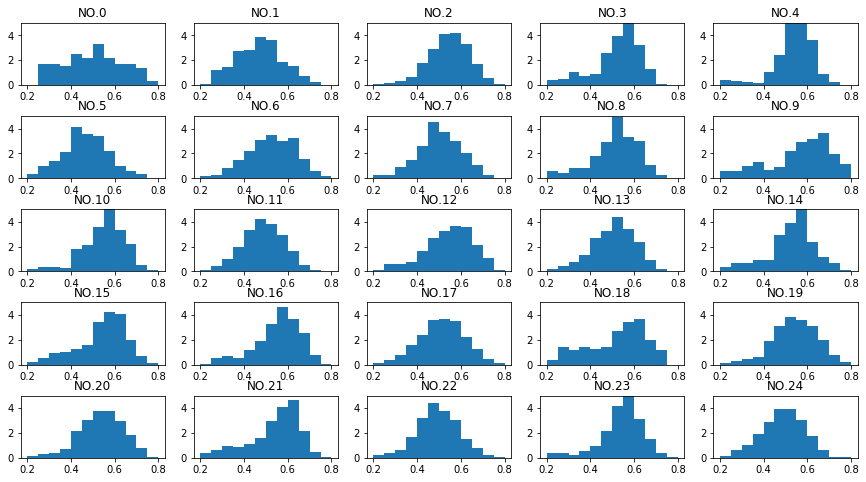

In [40]:
fig, ax = plt.subplots(figsize=[15, 8])
for i in range(len(X6)):
    plt.subplot(5,5,i+1);plt.ylim(0,5);plt.title("NO."+str(i));
    plt.hist(X6.all_cosins[i],12,range=(0.2,0.8),density = True)
    plt.subplots_adjust(hspace=0.5)
plt.show()

###### <考察> 分布形状（平均値、中央値、標準偏差など）により掲示板を分類できるかもしれない（今回は省略）。

### Osetiによる感情分析

In [44]:
sentiment_value = []
posi_score = pd.DataFrame(columns=["url","posi","posi2"]) 
nega_score = pd.DataFrame(columns=["url","nega","nega2"]) 
posi_score.url = X2.url
nega_score.url = X2.url

analyzer = oseti.Analyzer()

for i in range(len(X2)):
    sentiment_value = []
    for texts in X2.ALL_TEXT[i]:
        sentiment_value.append(analyzer.analyze("'"+texts+"'"))
        
    temp = list(itertools.chain.from_iterable(sentiment_value))
    sentiment_posi = 0
    sentiment_nega = 0
    
    for j in temp:
        if j >0 :
            sentiment_posi += j
        else:
            sentiment_nega += j
    posi_score.posi[i] = sentiment_posi
    posi_score.posi2[i] = sentiment_posi/len(X2.ALL_TEXT[i])
    nega_score.nega[i] = sentiment_nega
    nega_score.nega2[i] = sentiment_nega/len(X2.ALL_TEXT[i])


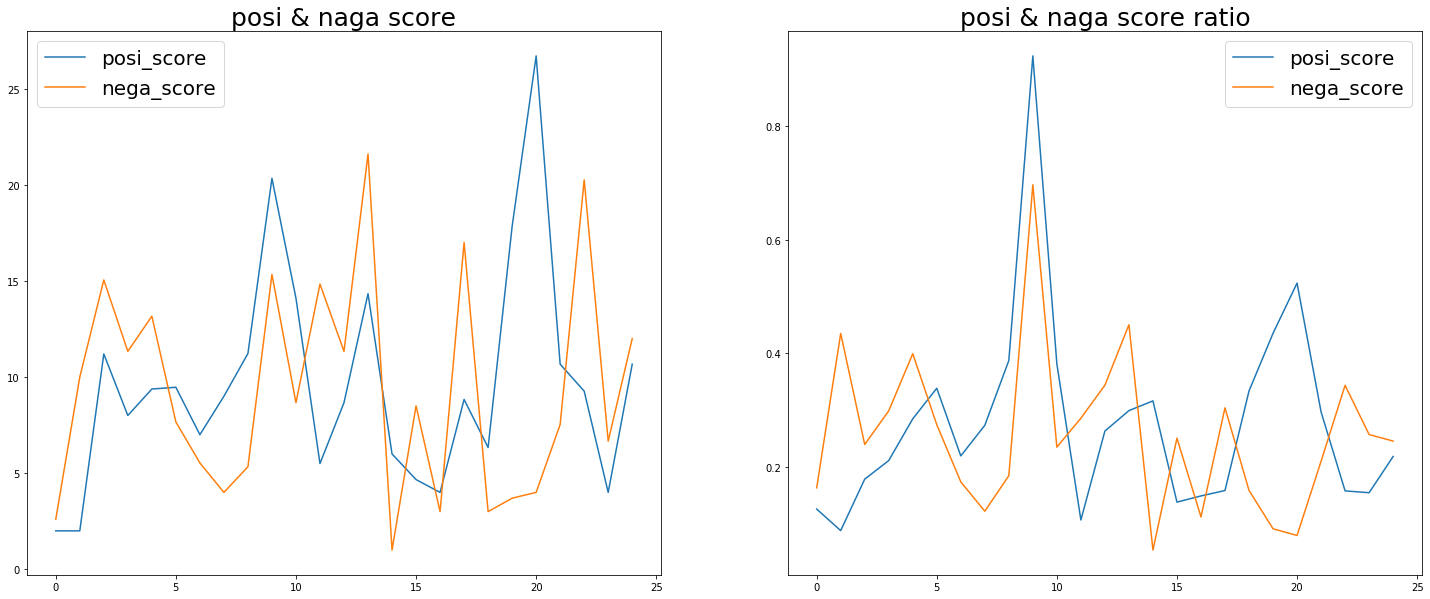

In [46]:
sentiment_score = pd.merge(posi_score,nega_score,on="url",how="inner")
fig, ax = plt.subplots(figsize=[25, 10])
plt.subplot(1,2,1)
plt.title("posi & naga score",fontsize=25)

plt.plot(posi_score.posi, label="posi_score")
plt.plot(nega_score.nega*(-1),label="nega_score")
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.title("posi & naga score ratio",fontsize = 25)
plt.plot(posi_score.posi2, label="posi_score")
plt.plot(nega_score.nega2*(-1), label="nega_score")
plt.legend(fontsize=20)

plt.show()

### ＜考察＞
左グラフ：各掲示板の書込みごとにOsetiによる感情分析スコアを出し、合計値を取得したもの。
右グラフ：各掲示板の書込みごとにOsetiによる感情分析スコアを出し、合計値を取得して書き込み数で割ったもの。
２０番（’お前らって二つ折り財布？長財布？'）には、明らかな偏りが見られたものの、多くの掲示板では、肯定表現と否定表現が混在しこれらの傾向に基づいて何かしらの分類をするのは難しそうだ。否定的なタイトルに対して、否定的な書き込みが多いものと思っていただけに想定外の結果になった。

In [47]:
pd.concat([X1.title,sentiment_score],axis=1)

,title,url,posi,posi2,nega,nega2
0,野党、国会で審議すべき課題が山積 臨時国会の召集を,http://military38.com/archives/54872413.html,2,0.125,-2.6,-0.1625
1,もし日本が最後まで無条件降伏しなかったら,http://military38.com/archives/54308723.html,2,0.0869565,-10,-0.434783
2,自衛隊員「だ、ダメだ…！戦争とはいえ、人なんか撃てない…！」ｶﾞﾀｶﾞﾀ,http://military38.com/archives/54871992.html,11.2,0.177778,-15.0476,-0.238851
3,GoToトラベルキャンペーン、東京以外の地域が予約後に「適用除外」の場合、割引分は客負担 キ...,http://military38.com/archives/54871785.html,8,0.210526,-11.3333,-0.298246
4,中国は大東亜戦争の時のアメリカの何を見て学んで、全方位敵対外交なんてバカなことしたんだろうな。,http://military38.com/archives/54871691.html,9.37619,0.284127,-13.1667,-0.39899
5,【中東情勢】イラン、ペルシャ湾で軍事演習 米空母の実物大模型を攻撃,http://military38.com/archives/54871653.html,9.46667,0.338095,-7.66667,-0.27381
6,中国外相「横暴なアメリカに理性的で断固たる対応」,http://military38.com/archives/54871547.html,7,0.21875,-5.53333,-0.172917
7,原子力発電所「核反応させてお湯わかして蒸気作ります」,http://military38.com/archives/54865708.html,9,0.272727,-4,-0.121212
8,田舎から若者がいなくなるのは当たり前じゃね？,http://military38.com/archives/54870861.html,11.2222,0.386973,-5.33333,-0.183908
9,明智光秀「信長の重鎮になったよ母さん！」母親「…」,http://military38.com/archives/54869238.html,20.3333,0.924242,-15.3333,-0.69697


#### posi_scoreとnega_scoreの乖離が大きかった20番「お前らって二つ折り財布？長財布？」の掲示板内容は下記の通り。

In [49]:
for i in X2.ALL_TEXT[20]:
    print(i) 
    print(analyzer.analyze("'"+i+"'"))

お前らって二つ折り財布？長財布？ : 大艦巨砲主義！
[0, 1.0, 0]
二つ折り派だったけど長財布カッコよすぎてヤバい
[1.0]
二つ折り
[0]
長財布と小銭入れの二刀流
[1.0]
長財布
[1.0]
結局二つ折りが便利だった
[1.0]
>>7そうなんだよな…
[0, 0]
高校生の頃だけだな長財布使ってたの二つ折りケツポケが一番楽
[1.0]
まだ財布なんか使ってんの？笑
[0, 0]
キャッシュレスに完全移行したから名刺入れみたいなのにクレジットカード類ともしもの時の万札突っ込んで持ってる現金派だった頃はポケットパンパンだったから楽でいいわ
[1.0]
>>13小銭出た時どうしてる？
[0]
>>15小さい小物入れポケットみたいなの付いてるから多分5枚くらいなら入る
[0]
二つ折りの革
[0]
長財布！
[1.0]
財布レスもいいよなぁ
[1.0]
長財布の革買ってから二つ折りには戻れなくなったわボロボロだしそろそろ新しいの買いたいな
[0.0]
>>23そう聞くと欲しくなる5万くらいの革の長財布見てきたけどかっこよすぎて震えた
[0.0]
革付きのマネークリップだわ
[1.0]
長財布は確かに使う時は便利だが持ち歩きに非常に不便で二つ折りに戻った
[0.0]
両方
[0]
バリバリ財布だよこの前も本屋で響かせてきた
[0]
二つ折り使ってたけど誕プレで長財布もらってからは長財布だわ
[1.0]
>>37まあ誕プレでいい物貰ったらそれ使うわな
[1.0]
>>37誕プレで財布よこすのくそむかつかん？
[-1.0]
>>46まあとりあえずお礼言うけど内心どうすんだよこれ状態だわな
[0]
カバンに長財布と尻にちっさい二つ折り基本長財布は触らんけどな二つ折りの中に入れてる電子マネー、交通系、クレカで全て事足りるから楽だわ
[1.0]
長財布良いよ
[1.0]
昔の彼女にいわれたこと男はてぶらじゃないとダサいポッケが膨らむのもダメ
[-1.0]
そんなに現金使わないから三つ折り入らないカードはカード入れに分けた
[1.0]
マネークリップも良いんだけどなんか逆に気取り過ぎててダサい感じもしてしまう
[0.3333333333333333]
>>47意識高い系はあれ好きだよな
[1.0]
財布(二つ折り)キーケース(車、家)スマホこれで事足りるちなみに最